In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [4]:
# Configurações do Selenium
driver = webdriver.Chrome()  # This assumes the ChromeDriver is in the PATH
url_alvo = 'https://www.fundsexplorer.com.br/ranking'  # URL alvo para o web scraping

In [5]:
# Navega para a URL alvo
driver.get(url_alvo)

In [6]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [7]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [8]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [9]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária", "P/VP", 
                                         "Ultimo Dividendo", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [18]:
df.head(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,"9,40","895.685,27","1,01","0,10","1,03 %","3,83 %","8,26 %","8,26 %",...,"230.646.828,88","9,60","0,98","1,46 %","0,00 %","0,00 %","0,00 %",N/A,N/A,0
1,ABCP11,SHOPPINGS,"71,42","59.139,02","0,78","0,50","0,70 %","2,15 %","4,44 %","8,96 %",...,"432.162.687,00","91,82","0,78","0,65 %","-0,18 %","0,47 %","7,12 %",N/A,N/A,1
2,AFHI11,PAPÉIS,"96,75","790.471,95","1,01","1,10","1,11 %","3,38 %","6,80 %","13,31 %",...,"290.388.018,85","94,82","1,02","1,01 %","-0,94 %","0,06 %","5,00 %",N/A,N/A,0
3,AGRX11,OUTROS,"10,80","298.930,15",N/A,"0,17","1,49 %","4,76 %","9,47 %","14,70 %",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0
4,AIEC11,LAJES CORPORATIVAS,"70,95","493.425,12","0,75","0,78","1,10 %","3,59 %","6,31 %","13,04 %",...,"456.469.305,49","102,56","0,69","0,73 %","0,24 %","0,98 %","9,40 %",N/A,N/A,2


In [19]:
df.sample(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
19,BBPO11,AGÊNCIAS DE BANCOS,"97,57","1.291.081,63","0,98","0,90","0,91 %","2,91 %","6,09 %","12,35 %",...,"1.588.185.145,13","100,37","0,97","0,92 %","0,06 %","0,98 %","15,85 %",N/A,N/A,63
381,XPPR11,LAJES CORPORATIVAS,"22,53","266.681,73","0,32","0,10","0,43 %","1,29 %","2,93 %","7,41 %",...,"516.356.911,54","74,77","0,30","0,40 %","0,05 %","0,45 %","-3,65 %",N/A,N/A,5
165,HUSI11,HOSPITALAR,"1.136,80","14.783,25","1,03","7,96","0,00 %","0,68 %","0,68 %","4,92 %",...,"128.915.777,56","991,67","1,15","0,88 %","-0,83 %","0,05 %","4,33 %",N/A,N/A,0
368,VVPR11,MISTO,"101,50","1.249.061,55","1,04","0,89","0,89 %","2,47 %","4,88 %","9,72 %",...,"226.032.234,18","103,41","0,98","0,74 %","0,02 %","0,76 %","1,53 %",N/A,N/A,6
38,BODB11,INDEFINIDO,"9,71","588.588,98",N/A,"0,09","0,87 %","2,45 %","5,48 %","12,93 %",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0


In [20]:
df.tail(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
383,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",N/A,N/A,N/A,N/A,...,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",N/A,N/A,1
384,YUFI11,FUNDO DE DESENVOLVIMENTO,"80,01","3.699,90","0,79","0,33","0,33 %","0,48 %","0,72 %","0,72 %",...,"50.096.123,92",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,31
385,YUFI11B,INDEFINIDO,N/A,N/A,N/A,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,N/A,"105,53",N/A,"0,60 %","-0,01 %","0,59 %","6,32 %",N/A,N/A,0
386,ZAVI11,INDEFINIDO,"127,45","166.404,46","0,92","1,16","0,92 %","2,66 %","5,15 %","7,00 %",...,"127.018.551,30",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8
387,ZIFI11,FUNDO DE DESENVOLVIMENTO,"1.000,00","11.995,57","0,83","3,31","0,00 %","0,00 %","0,00 %","0,00 %",...,"57.307.512,13",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0


In [25]:
df.shape

(388, 27)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fundos                   388 non-null    object
 1   Setor                    388 non-null    object
 2   Preço Atual(R$)          388 non-null    object
 3   Liquidez Diária          388 non-null    object
 4   P/VP                     388 non-null    object
 5   Ultimo Dividendo         388 non-null    object
 6   Dividend Yield           388 non-null    object
 7   DY (3M) Acumulado        388 non-null    object
 8   DY(6M) Acumulado         388 non-null    object
 9   DY(12M) Acumulado        388 non-null    object
 10  DY(3M) Média             388 non-null    object
 11  DY(6M) Média             388 non-null    object
 12  DY(12M) Média            388 non-null    object
 13  DY Ano                   388 non-null    object
 14  Variação do Preço        388 non-null    o

In [22]:
df.isnull().sum()

Fundos                     0
Setor                      0
Preço Atual(R$)            0
Liquidez Diária            0
P/VP                       0
Ultimo Dividendo           0
Dividend Yield             0
DY (3M) Acumulado          0
DY(6M) Acumulado           0
DY(12M) Acumulado          0
DY(3M) Média               0
DY(6M) Média               0
DY(12M) Média              0
DY Ano                     0
Variação do Preço          0
Rentab. Período            0
Rentab. Acumulada          0
Patrimônio Líquido         0
VPA                        0
P/VPA                      0
DY Patrimonial             0
Variação Patrimonial       0
Rentab. Patr. Período      0
Rentab. Patr. Acumulada    0
Vacancia Física            0
Vacancia Financeira        0
Quantidade de Ativos       0
dtype: int64

In [23]:
df["Setor"].value_counts()

PAPÉIS                              80
INDEFINIDO                          59
LAJES CORPORATIVAS                  56
FUNDO DE DESENVOLVIMENTO            40
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    38
FUNDO DE FUNDOS                     33
SHOPPINGS                           25
MISTO                               24
HOSPITALAR                           6
IMÓVEIS COMERCIAIS - OUTROS          5
VAREJO                               5
IMÓVEIS RESIDENCIAIS                 4
AGÊNCIAS DE BANCOS                   4
EDUCACIONAL                          4
HOTÉIS                               3
OUTROS                               1
FIAGRO                               1
Name: Setor, dtype: int64

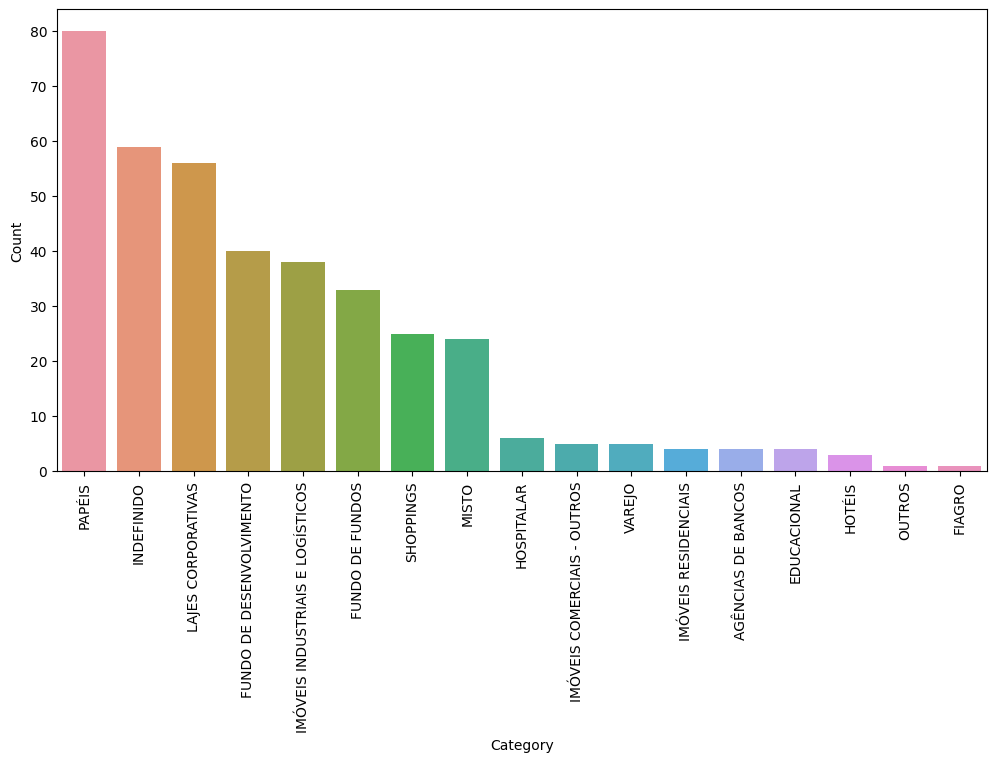

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Setor',data=df,order=df.Setor.value_counts().index)
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()